<u>**SMA Project Check list**</u>: <br>
https://www.notion.so/mekongdelta/SMA-project-checklist-1bd9d61bcb894b7eaa7e3958d6a1bbae

# Problem Statement

TO BE ADDED AFTERWARDS

# Data Sources

In [1]:
# install main library YFinance
!pip install yfinance

In [51]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

# for graphs
import matplotlib.pyplot as plt


## Selecting the period for the observation

In [3]:
# Set end to the last date of March 2024
end = date(year=2024, month=3, day=31)
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

# Set start to April 1, 2000
start = date(year=2000, month=4, day=1)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 3; day=31
Period for indexes: 2000-04-01 to 2024-03-31 


In [4]:
nifty_50_df = yf.download(tickers = "^NSEI",
            start=start,
            end = end,
            interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [5]:
nifty_50_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0


In [6]:
nifty_50_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-21,21989.900391,22080.949219,21941.300781,22011.949219,22011.949219,353200
2024-03-22,21932.199219,22180.699219,21883.300781,22096.750000,22096.750000,388700
2024-03-26,21947.900391,22073.199219,21947.550781,22004.699219,22004.699219,328400
2024-03-27,22053.949219,22193.599609,22052.849609,22123.650391,22123.650391,409100
2024-03-28,22163.599609,22516.000000,22163.599609,22326.900391,22326.900391,410500


`NOTE`: The date for which the yfincae has the data for nifty 50 is from 17,9,2007. So we are changing the period of observation from `April 1, 2024` to `April 1,2009` which is just after the 2008 financial crisis

In [7]:
# Set end to the last date of March 2024
end = date(year=2024, month=3, day=31)
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

# Set start to April 1, 2009
start = date(year=2009, month=4, day=1)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 3; day=31
Period for indexes: 2009-04-01 to 2024-03-31 


In [8]:
nifty_50_df = yf.download(tickers = "^NSEI",
            start=start,
            end = end,
            interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [9]:
nifty_50_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-04-01,3023.850098,3069.300049,2965.699951,3060.350098,3060.350098,0
2009-04-02,3061.050049,3228.750000,3061.050049,3211.050049,3211.050049,0
2009-04-06,3211.350098,3303.899902,3211.350098,3256.600098,3256.600098,0
2009-04-08,3255.350098,3357.050049,3149.250000,3342.949951,3342.949951,0
2009-04-09,3346.000000,3401.149902,3307.050049,3342.050049,3342.050049,0


Before the change:

|Date|Open|High|Low|Close|Adj Close|Volume|
|---|---|---|---|---|---|---|
|2007-09-17 00:00:00|4518\.4501953125|4549\.0498046875|4482\.85009765625|4494\.64990234375|4494\.64990234375|0|
|2007-09-18 00:00:00|4494\.10009765625|4551\.7998046875|4481\.5498046875|4546\.2001953125|4546\.2001953125|0|
|2007-09-19 00:00:00|4550\.25|4739\.0|4550\.25|4732\.35009765625|4732\.35009765625|0|
|2007-09-20 00:00:00|4734\.85009765625|4760\.85009765625|4721\.14990234375|4747\.5498046875|4747\.5498046875|0|
|2007-09-21 00:00:00|4752\.9501953125|4855\.7001953125|4733\.7001953125|4837\.5498046875|4837\.5498046875|0|

---

After the change:

|Date|Open|High|Low|Close|Adj Close|Volume|
|---|---|---|---|---|---|---|
|2009-04-01 00:00:00|3023\.85009765625|3069\.300048828125|2965\.699951171875|3060\.35009765625|3060\.35009765625|0|
|2009-04-02 00:00:00|3061\.050048828125|3228\.75|3061\.050048828125|3211\.050048828125|3211\.050048828125|0|
|2009-04-06 00:00:00|3211\.35009765625|3303\.89990234375|3211\.35009765625|3256\.60009765625|3256\.60009765625|0|
|2009-04-08 00:00:00|3255\.35009765625|3357\.050048828125|3149\.25|3342\.949951171875|3342\.949951171875|0|
|2009-04-09 00:00:00|3346\.0|3401\.14990234375|3307\.050048828125|3342\.050048828125|3342\.050048828125|0|



In [10]:
nifty_50_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-21,21989.900391,22080.949219,21941.300781,22011.949219,22011.949219,353200
2024-03-22,21932.199219,22180.699219,21883.300781,22096.750000,22096.750000,388700
2024-03-26,21947.900391,22073.199219,21947.550781,22004.699219,22004.699219,328400
2024-03-27,22053.949219,22193.599609,22052.849609,22123.650391,22123.650391,409100
2024-03-28,22163.599609,22516.000000,22163.599609,22326.900391,22326.900391,410500


## list of stocks in nifty 50

`TO be checked every quarter`

Official site:

* Website for the list: https://www.nseindia.com/products-services/indices-nifty50-index

* CSV download link: https://nsearchives.nseindia.com/content/indices/ind_nifty50list.csv

3rd party site:
Extract from the site:
* https://www.equitymaster.com/india-markets/nse-replica.asp?order=researchText.no_shares_act%20desc

In [20]:
import requests
from bs4 import BeautifulSoup
import csv


In [21]:
url = "https://www.equitymaster.com/india-markets/nse-replica.asp?order=researchText.no_shares_act%20desc"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

response = requests.get(url, headers=headers)


In [22]:
# Parse the HTML content of the webpage
soup = BeautifulSoup(response.content, "html.parser")

In [23]:
# You need to be able to find this table tag and read all behind it
# Find the div with class "mystocksbig mystocks newtab cls"
table = soup.find('table', {'class': 'mystocksbig mystocks newtab cls'})

In [24]:
type(table)

bs4.element.Tag

In [25]:
# Extract headers
headers = []
for th in table.find('thead').find_all('th'):
    headers.append(th.get_text(strip=True))

In [26]:
headers.remove('Based on Equitymaster Estimatesand Publicly Available Information')
headers[3:]

['COMPANY',
 'INDUSTRY',
 'MARKET PRICE(Rs)',
 'CHANGE(%)',
 'NO OFSHARES(m)',
 'MARKET CAP.**(Rs m)',
 'FREE FLOATADJ. FACTOR#',
 'EARNINGS *(Rs m)',
 'EPS(Rs)',
 'PER(X)']

In [27]:
selected_headers  = ['COMPANY', 'INDUSTRY']

In [28]:
# Extract rows
rows = []
for tr in table.find('tbody').find_all('tr'):
    cells = tr.find_all('td')
    row = [cell.get_text(strip=True) for cell in cells]
    rows.append(row)

In [29]:
# Write to CSV
csv_filename = 'stocks_data.csv'
with open(csv_filename, 'w', newline='', encoding='utf-8') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(headers[3:])  # Write headers
    csvwriter.writerows(rows)    # Write data rows

print(f"Data has been written to {csv_filename}")

Data has been written to stocks_data.csv


In [30]:
nifty50__updated_list = pd.read_csv('./stocks_data.csv', sep=',')
nifty50__updated_list

,COMPANY,INDUSTRY,MARKET PRICE(Rs),CHANGE(%),NO OFSHARES(m),MARKET CAP.**(Rs m),FREE FLOATADJ. FACTOR#,EARNINGS *(Rs m),EPS(Rs),PER(X)
0,IOC,ENERGY,169.1,-1.5,"14,121.2","2,388,325",0.5,"416,152",29.5,5.7
1,ONGC,ENERGY,292.5,-1.7,"12,580.3","3,679,732",0.4,"538,153",42.8,6.8
2,ITC,FOOD & TOBACCO,448.7,-0.9,"12,489.3","5,603,948",1.0,"207,238",16.6,27.0
3,TATA STEEL,STEEL,168.7,-1.8,"12,483.5","2,105,460",0.7,"-48,516",-3.9,-
4,NTPC,POWER,373.9,-0.8,"9,696.7","3,625,583",0.5,"186,967",19.3,19.4
5,POWER GRID,POWER,337.9,-1.0,"9,300.6","3,142,209",0.5,"161,641",17.4,19.4
6,SBI,BANKING,846.5,-1.7,"8,924.6","7,554,684",0.4,"681,383",76.3,11.1
7,HDFC BANK,BANKING,"1,631.5",-0.3,"7,608.1","12,412,271",1.0,"654,465",86.0,19.0
8,ICICI BANK,BANKING,"1,243.2",-0.4,"7,037.3","8,748,480",1.0,"450,067",64.0,19.4
9,RELIANCE IND.,ENERGY,"3,146.0",-1.1,"6,766.2","21,286,556",0.5,"786,330",116.2,27.1


## Daily OHCLV data for a set of stocks

In [35]:
stock = nifty50__updated_list['COMPANY'][0]
stock = "IOC.NS"

In [37]:
ioc_df = yf.download(tickers = stock, # stock name should be according to the y.finance
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [38]:
ioc_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-04-15,18.055555,18.055555,17.222221,17.222221,5.129947,43200
1996-04-16,17.222221,17.222221,17.222221,17.222221,5.129947,0
1996-04-17,17.222221,17.222221,17.222221,17.222221,5.129947,3600
1996-04-18,17.222221,18.055555,17.222221,17.222221,5.129947,14400
1996-04-19,17.222221,17.222221,17.222221,17.222221,5.129947,7200


In [39]:
ioc_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-04,170.100006,171.300003,169.179993,170.169998,170.169998,26156046
2024-07-05,170.899994,171.940002,169.710007,171.279999,171.279999,26431264
2024-07-08,172.210007,172.809998,169.750000,170.070007,170.070007,30322381
2024-07-09,171.289993,172.699997,170.500000,171.669998,171.669998,28600182
2024-07-10,172.300003,172.490005,167.199997,169.720001,169.720001,17979615


In [40]:
start, type(start), end, type(end)

(datetime.date(2009, 4, 1),
 datetime.date,
 datetime.date(2024, 3, 31),
 datetime.date)

In [42]:
# filter on date (index) period
ioc_df_filtered_from_2009 = ioc_df[(ioc_df.index >= '2009-04-01') & (ioc_df.index <= '2023-03-31')] # from 1st april 2009 to march 31st, 2023
ioc_df_filtered_from_2023 = ioc_df[ioc_df.index >= '2023-04-01'] # march 31st, 2023

<Axes: title={'center': 'Novo Nordisk A/S (NVO) price daily'}, xlabel='Date'>

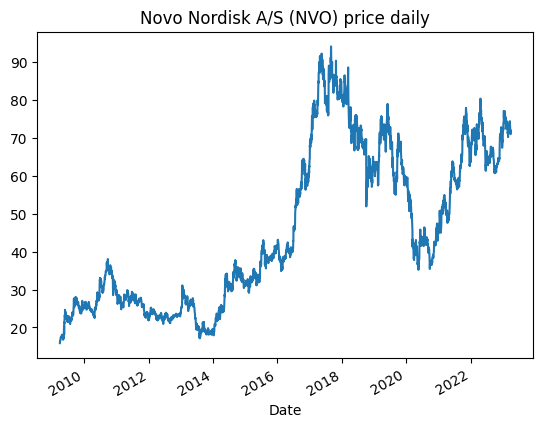

In [43]:
# Chaining: select one column, draw a plot, of a type line
ioc_df_filtered_from_2009['Adj Close'].plot.line(title='Novo Nordisk A/S (NVO) price daily')

In [44]:
# generating new fields (using DateTime features):

ioc_df['Ticker'] = 'NVO'
ioc_df['Year']= ioc_df.index.year
ioc_df['Month'] = ioc_df.index.month
ioc_df['Weekday'] = ioc_df.index.weekday
ioc_df['Date'] = ioc_df.index.date # to be used in joins

In [45]:
# shift ALL values (on x periods forward (+1) and backward (-1))
# equivalent of joining with a dataframe of the same vector, but with shifted date index
ioc_df['adj_close_minus_1'] = ioc_df['Adj Close'].shift(-1)
ioc_df['adj_close_plus_1'] = ioc_df['Adj Close'].shift(1)

In [46]:
ioc_df.tail()

,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month,Weekday,Date,adj_close_minus_1,adj_close_plus_1
Date,,,,,,,,,,,,,
2024-07-04,170.100006,171.300003,169.179993,170.169998,170.169998,26156046,NVO,2024,7,3,2024-07-04,171.279999,169.309998
2024-07-05,170.899994,171.940002,169.710007,171.279999,171.279999,26431264,NVO,2024,7,4,2024-07-05,170.070007,170.169998
2024-07-08,172.210007,172.809998,169.750000,170.070007,170.070007,30322381,NVO,2024,7,0,2024-07-08,171.669998,171.279999
2024-07-09,171.289993,172.699997,170.500000,171.669998,171.669998,28600182,NVO,2024,7,1,2024-07-09,169.720001,170.070007
2024-07-10,172.300003,172.490005,167.199997,169.720001,169.720001,17979615,NVO,2024,7,2,2024-07-10,NaN,171.669998


In [47]:

# historical growth
ioc_df['growth_1d'] = ioc_df['Adj Close'] / ioc_df['Adj Close'].shift(1)           # ioc_df['adj_close_plus_1']
ioc_df['growth_30d'] = ioc_df['Adj Close'] / ioc_df['Adj Close'].shift(30)

In [48]:
# FUTURE Growth : for regression models
ioc_df['growth_future_1d'] = ioc_df['Adj Close'].shift(-1) / ioc_df['Adj Close']   # ioc_df['adj_close_minus_1']

In [49]:
# FUTURE Growth: for binary models
ioc_df['is_positive_growth_1d_future'] = np.where(ioc_df['growth_future_1d'] > 1, 1, 0)

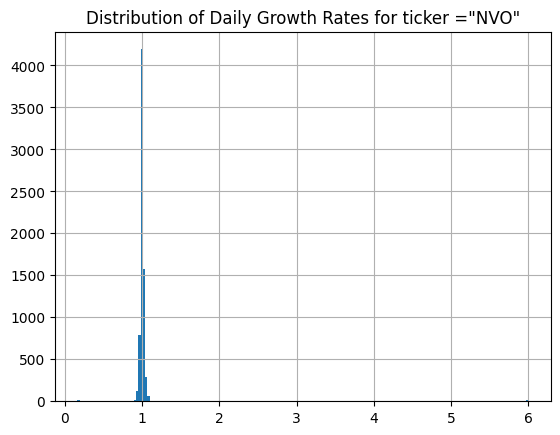

In [52]:
# normally the growth in 1 day is +-10%, while a lot of it is around 0% (around 1.)
plt.title('Distribution of Daily Growth Rates for ticker ="IOC"')
ioc_df.growth_1d.hist(bins=200)
plt.show()


<Axes: title={'center': 'Distribution of 2-days Growth Rates for ticker = "NVO"'}>

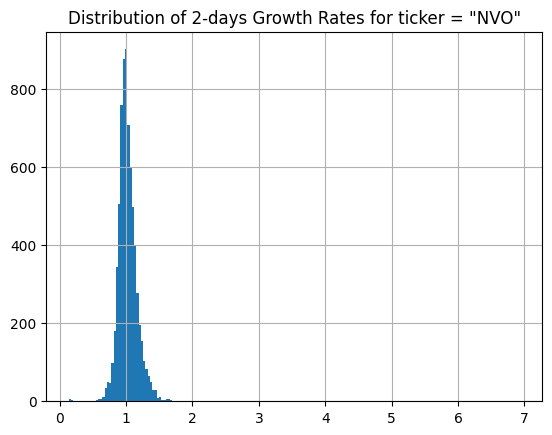

In [53]:
# you can see that the growth is can be much wider in 30 days (+- 30%)
plt.title('Distribution of 2-days Growth Rates for ticker = "NVO"')
ioc_df.growth_30d.hist(bins=200)

In [54]:
# for modeling: we use growth_1d, growth_2d as feature
COLUMNS = [k for k in ioc_df.keys() if k.find('growth')>=0 or k=='Adj Close']
ioc_df[COLUMNS].tail()

,Adj Close,growth_1d,growth_30d,growth_future_1d,is_positive_growth_1d_future
Date,,,,,
2024-07-04,170.169998,1.005079,1.019287,1.006523,1
2024-07-05,171.279999,1.006523,1.019827,0.992936,0
2024-07-08,170.070007,0.992936,1.007524,1.009408,1
2024-07-09,171.669998,1.009408,1.016400,0.988641,0
2024-07-10,169.720001,0.988641,1.015983,NaN,0


In [55]:
# Calculate the distribution if future growth
ioc_df.is_positive_growth_1d_future.value_counts() / len(ioc_df)

is_positive_growth_1d_future
0    0.51566
1    0.48434
Name: count, dtype: float64

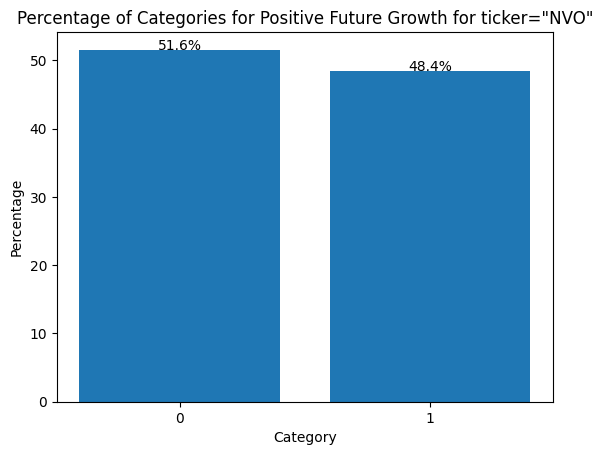

In [60]:
# Calculate value counts
value_counts = ioc_df['is_positive_growth_1d_future'].value_counts()

# Calculate percentage of each category
percentage = (value_counts / len(ioc_df)) * 100

# Plot as a bar chart
plt.bar(percentage.index.astype(str), percentage)
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Percentage of Categories for Positive Future Growth for ticker="NVO"')

# Add percentage values on top of each bar
for i, value in enumerate(percentage):
    plt.text(i, value + 0, f'{value:.1f}%', ha='center')

plt.show()

# Data Transformations + EDA

# Modelling

# Trading Simulation

# Automation ( from here onwards it should be moved to local)

# Bonus points